In [1]:
import pandas as pd
import numpy as np

# Parte 1

* Carga de Datos
* Creación de columnas adicionales  synthetic_features.csv

In [2]:
df=pd.read_csv('dataset_SCL.csv')

C:\Users\saave\AppData\Local\Temp\ipykernel_10124\2394922931.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('dataset_SCL.csv')


### 1.0 Revisión General de la Data

In [3]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df.shape

(68206, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


### 1.1 Cambio tipo de datos columnas Fechas a datetime

In [6]:
df['Fecha-I']=pd.to_datetime(df['Fecha-I'])
df['Fecha-O']=pd.to_datetime(df['Fecha-O'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

## 1.2 Generación de Columnas synthetic_features

* Creación de funciones que generarán las columnas
* Implementación
* Revisión y traspaso a csv según requerimiento

### Columna temporada alta

In [8]:
def temporada_alta(df):
    m=df['MES']
    d=df['DIA']
    
    if m==1 or m==2:
        res=1
    elif m==3 & (1<=d<=3):
        res=1
    elif (m==7) & (15<=d<=31):
        res=1
    elif (m==9) & (11<=d<=30):
        res=1
    elif (m==12) & (d>=15):
        res=1
    else:
        res=0
    return res

In [9]:
df['temporada_alta']=df.apply(temporada_alta, axis=1)

### Columna dif_min

In [10]:
import time 
import datetime
def diferencia(df):
    fmt = '%Y-%m-%d %H:%M:%S' 
    f1 = datetime.datetime.strptime(str(df['Fecha-O']), fmt) 
    f2 = datetime.datetime.strptime(str(df['Fecha-I']), fmt) 
    
    f1_ts = time.mktime(f1.timetuple()) 
    f2_ts = time.mktime(f2.timetuple()) 
    res_min=(int(f1_ts-f2_ts)) / 60
   
    return res_min

In [11]:
df['dif_min']=df.apply(diferencia, axis=1)

### Columna atraso_15

In [12]:
def atraso_min(df):
    param=df['dif_min']
    if param >15:
        res=1
    else:
        res=0
    return res

In [13]:
df['atraso_15']=df.apply(atraso_min, axis=1)

### Columna peridodo_dia

In [14]:
df['Hora']=[h.time() for h in df['Fecha-I']]

In [15]:
def periodo(df):
    h=df['Hora'].hour
    m=df['Hora'].minute
    
    if (5<=h<=10) | (h==11) & (m<=59):
        res='mañana'
    elif (12<=h<17) | (h==18) & (m<=59):
        res='tarde'
    else:
        res='noche'
    return res

In [16]:
df['periodo_dia']=df.apply(periodo, axis=1)

## 1.3 Revisión de columnas y creación archivo synthetic_features.csv

In [17]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,Hora,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,23:30:00,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,23:30:00,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,23:30:00,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,23:30:00,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,23:30:00,noche


In [18]:
df.to_csv('synthetic_features_full.csv')

In [19]:
#Sólo columnas adicionales synthetic_features
dfs=df[['temporada_alta','dif_min','atraso_15','periodo_dia']]

In [20]:
dfs.to_csv('synthetic_features.csv')

# Parte 2

* Análisis de datos y gráficas
* Análisis tasa de atraso y su contraste con otras variables
* Hipótesis y conclusiones

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2.0 Atraso a nivel macro

In [22]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

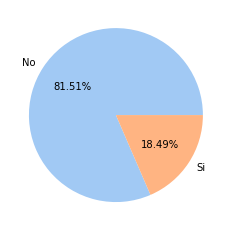

In [23]:
data = df['atraso_15'].value_counts()
labels = ['No', 'Si']

colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

### Conclusiones

* El atraso a nivel macro es del 18,49%

## 2.1 Atraso según su distribución en minutos

### a) Diferencia de minutos entre fecha y hora programada versus fecha y hora operación de vuelo

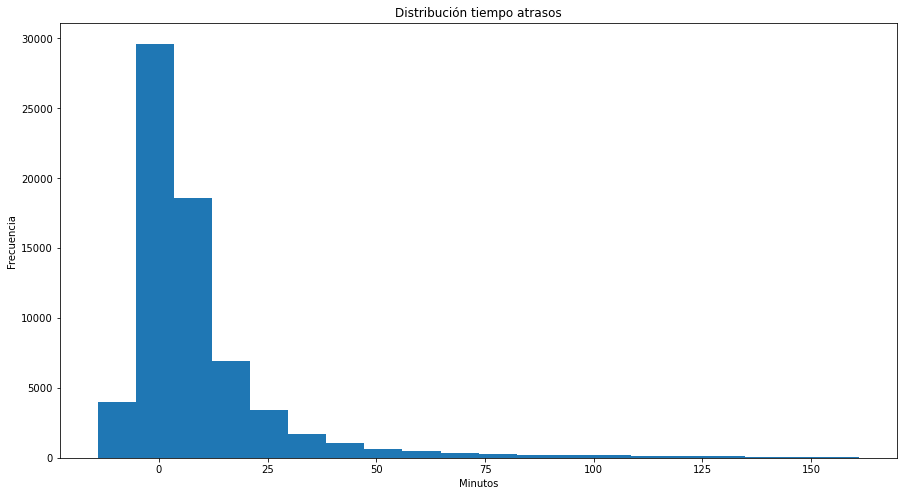

In [24]:
plt.figure(figsize=(15,8))
df['dif_min'].plot.hist(bins=20)
plt.title('Distribución tiempo atrasos')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia');

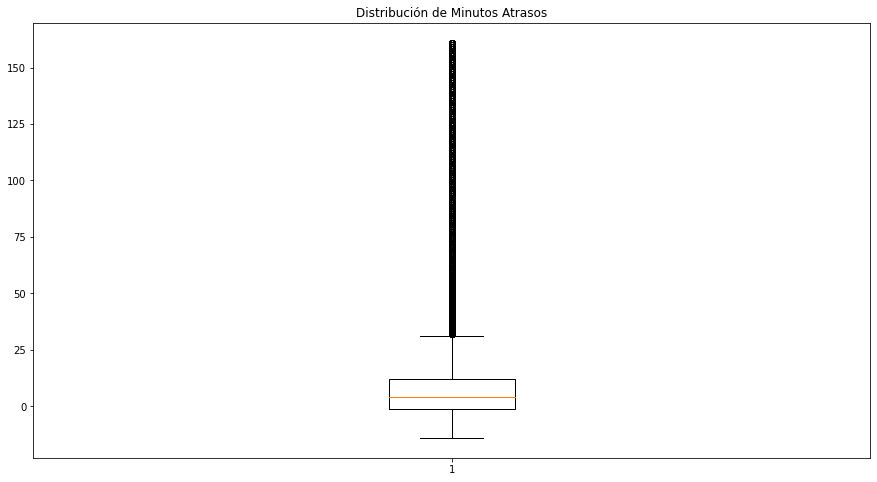

In [25]:
plt.figure(figsize=(15,8))
plt.boxplot(df['dif_min'])
plt.title('Distribución de Minutos Atrasos', loc='center')
plt.show()

In [26]:
df['dif_min'].describe()

count    68206.000000
mean         9.110855
std         19.313387
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: dif_min, dtype: float64

### Conclusiones

* Gran parte de los vuelos, más del 75% de los cosos tienen diferencias menores que no representan atrasos.
* Se presenta un alto número de casos con diferencias de minutos negativas, los casos son al menos el 25% de la data. El entendimiento mayor de estos casos podría modificar las tasas de atraso generales.
* La hipótesis respecto de estos casos de diferencia negativa podría pasar por el adelanto de salida de vuelos o falta de actualización por cambios entre hora programada y de operación, entre otros.

### b) Distribución general de atrasos por período del día

Text(0.5, 1.0, 'Distribución de Minutos Atrasos por Período del Día')

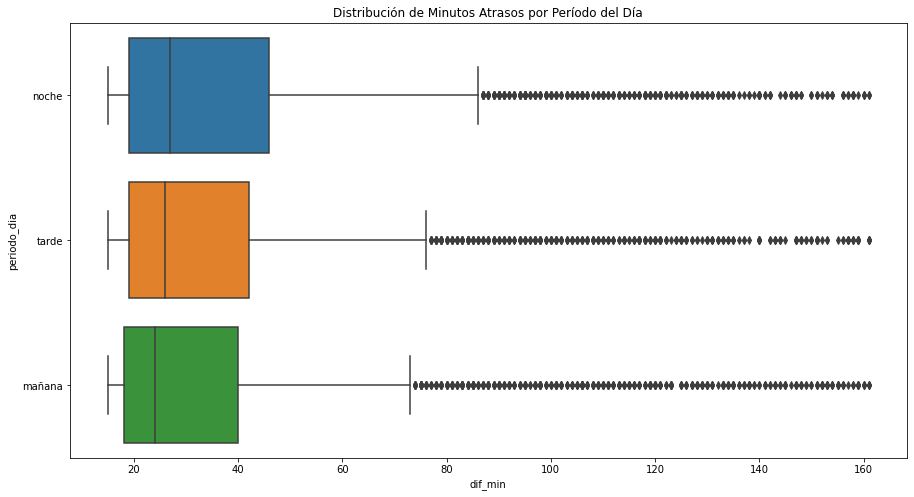

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df[df['dif_min']>=15]['dif_min'], y=df['periodo_dia'], data=df)
plt.title('Distribución de Minutos Atrasos por Período del Día', loc='center')

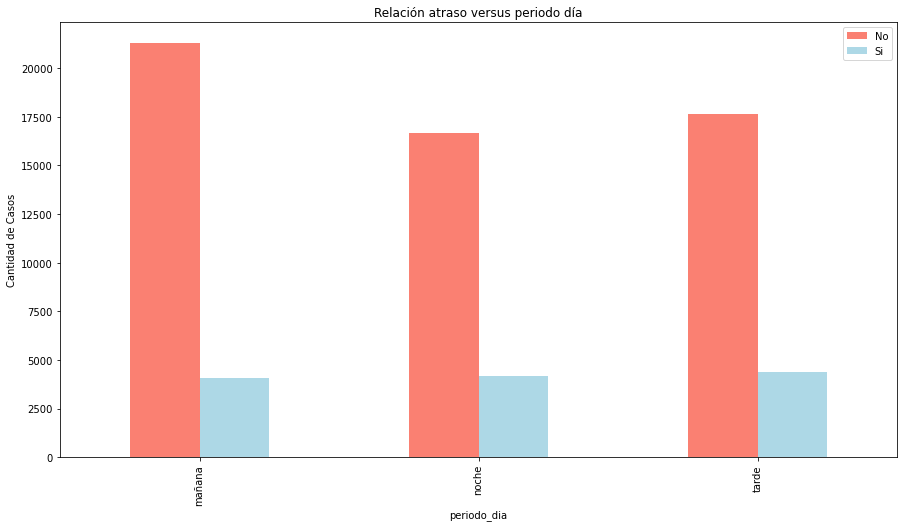

In [28]:
pd.crosstab(df.periodo_dia, df.atraso_15).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación atraso versus periodo día')
plt.ylabel('Cantidad de Casos')
plt.legend(['No', 'Si']);

In [29]:
# Porcentaje a nivel de índice para ver tasa por período
pd.crosstab(df.periodo_dia, df.atraso_15, margins=True, normalize='index', margins_name='Total')*100

atraso_15,0,1
periodo_dia,,
mañana,83.993373,16.006627
noche,80.007688,19.992312
tarde,80.059888,19.940112
Total,81.506026,18.493974


In [30]:
# Normalización a nivel global
pd.crosstab(df.periodo_dia, df.atraso_15, margins=True, normalize=True, margins_name='Total')*100

atraso_15,0,1,Total
periodo_dia,,,
mañana,31.220127,5.949623,37.169750
noche,24.414274,6.100636,30.514911
tarde,25.871624,6.443715,32.315339
Total,81.506026,18.493974,100.000000


In [31]:
# Cuenta general por periodo
pd.crosstab(df.periodo_dia, df.atraso_15, margins=True, margins_name='Total')

atraso_15,0,1,Total
periodo_dia,,,
mañana,21294,4058,25352
noche,16652,4161,20813
tarde,17646,4395,22041
Total,55592,12614,68206


### Conclusiones

* En general los atrasos más prolongados ocurren durante la noche, superando los 40 minutos en el 75% de los casos.
* A nivel de tasa de atraso, la noche sigue siendo el período con la mayor tasa de atraso (19.99%), pero es casi idéntica a la tasa de atraso de la tarde (19.94%).
* La mañana tiene la mayor cantidad de vuelos (25.352) y su tasa de atrasos es la menor (16 %).

## 2.3 Atraso según destino

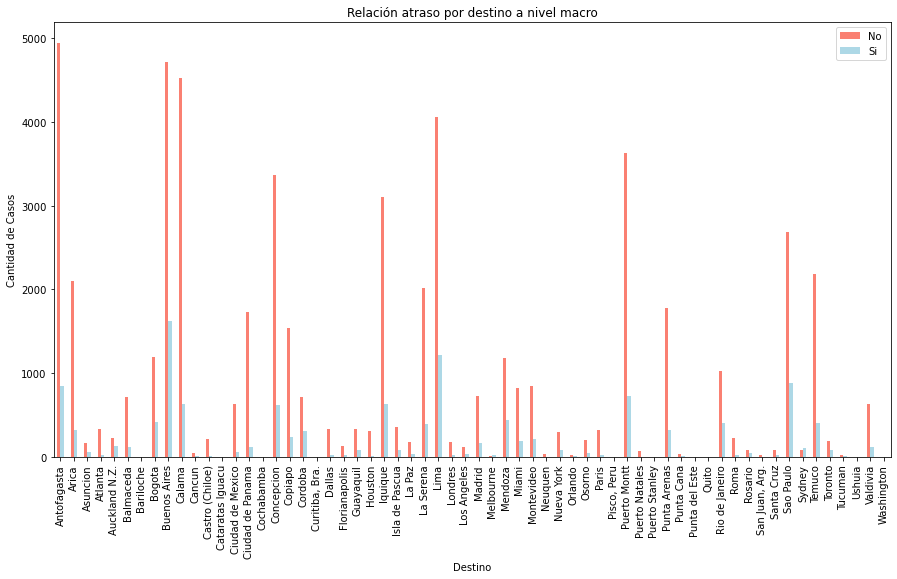

In [32]:
# por destino nivel macro
pd.crosstab(df.SIGLADES, df.atraso_15).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación atraso por destino a nivel macro')
plt.xlabel('Destino')
plt.ylabel('Cantidad de Casos')
plt.legend(['No', 'Si']);

#### Revisión de tasas de atraso por destino

In [33]:
# por destino
tablaDest=(pd.crosstab(df.SIGLADES, df.atraso_15, margins=True, normalize='index')*100)
tablaDest

atraso_15,0,1
SIGLADES,,
Antofagasta,85.361217,14.638783
Arica,86.453202,13.546798
Asuncion,71.551724,28.448276
Atlanta,94.134078,5.865922
Auckland N.Z.,62.603878,37.396122
...,...,...
Tucuman,73.684211,26.315789
Ushuia,33.333333,66.666667
Valdivia,84.462151,15.537849


In [34]:
# los 25 destinos con mayor tasa de atraso
tablaDest[1].sort_values(ascending=False)[:25].reset_index()

,SIGLADES,1
0,Puerto Stanley,100.000000
1,Quito,100.000000
2,Cochabamba,100.000000
3,Ushuia,66.666667
4,Sydney,58.247423
5,Melbourne,53.846154
6,Bariloche,50.000000
7,Rosario,39.705882
8,Auckland N.Z.,37.396122
9,Punta Cana,33.333333


### Conclusiones

* Existen 3 destinos con el 100% de atraso y en total 7 destinos con tasa de atrasos mayores al 50%.
* Los 25 destinos con mayor tasa de atraso, rango entre 21,4% y 100% son todos internacionales.

## 2.4 Atraso según aerolínea

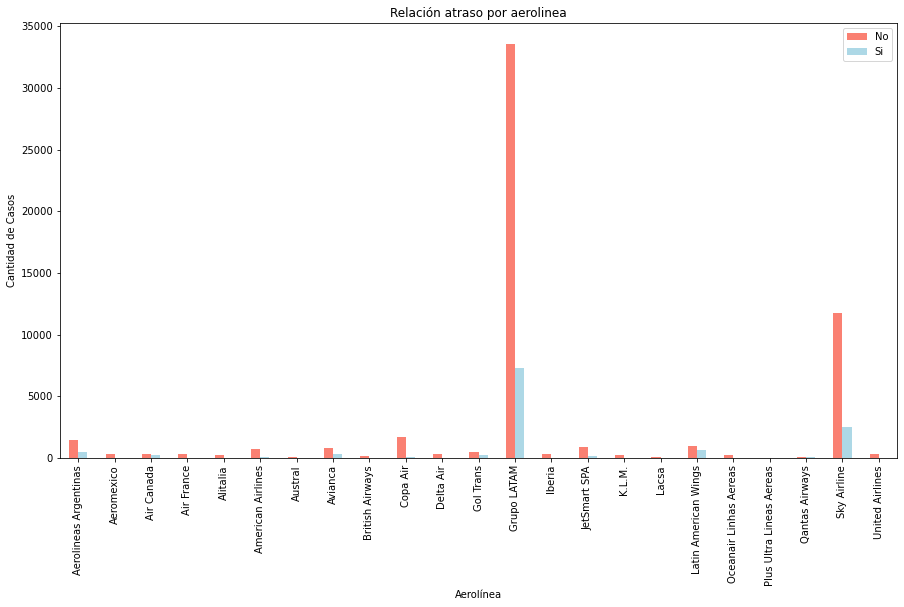

In [35]:
# por aerolinea
pd.crosstab(df.OPERA, df.atraso_15).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación atraso por aerolinea')
plt.xlabel('Aerolínea')
plt.ylabel('Cantidad de Casos')
plt.legend(['No', 'Si']);

#### Revisión de tasas de atraso por aerolínea

In [36]:
tablaOperador=pd.crosstab(df.OPERA, df.atraso_15, margins=True, normalize='index')*100
tablaOperador

atraso_15,0,1
OPERA,,
Aerolineas Argentinas,75.987686,24.012314
Aeromexico,97.150997,2.849003
Air Canada,54.336283,45.663717
Air France,91.620112,8.379888
Alitalia,88.803089,11.196911
American Airlines,93.262880,6.737120
Austral,79.729730,20.270270
Avianca,73.437500,26.562500
British Airways,85.853659,14.146341


In [37]:
tablaOperador[1].sort_values(ascending=False).reset_index()

,OPERA,1
0,Plus Ultra Lineas Aereas,61.224490
1,Qantas Airways,57.948718
2,Air Canada,45.663717
3,Latin American Wings,40.681004
4,Gol Trans,35.607940
5,Avianca,26.562500
6,Aerolineas Argentinas,24.012314
7,Austral,20.270270
8,All,18.493974
9,JetSmart SPA,17.899543


### Conclusiones

* Hay 5 aerolíneas con tasas de atraso entre el 35,6% y el 61,2%.
* Las 5 mayores tasas de atraso en aerolíneas son vuelos internacionales. El análisis se entrega en siguientes puntos.

## 2.5 Atraso según mes

In [38]:
df_ind_mes=df.set_index('Fecha-I')

In [39]:
tabla_fechas =df_ind_mes.groupby([pd.Grouper(freq='M'),'atraso_15'])['atraso_15'].count().unstack()
tabla_fechas['tasa_atraso_mensual']=(tabla_fechas[1]/(tabla_fechas[0]+tabla_fechas[1]))*100
tabla_fechas['Total vuelos']=tabla_fechas[0]+tabla_fechas[1]
tabla_fechas

atraso_15,0,1,tasa_atraso_mensual,Total vuelos
Fecha-I,,,,
2017-01-31,5129,979,16.028160,6108
2017-02-28,4718,843,15.159144,5561
2017-03-31,4851,629,11.478102,5480
2017-04-30,4435,586,11.670982,5021
2017-05-31,4413,826,15.766368,5239
2017-06-30,4130,852,17.101566,4982
2017-07-31,4233,1758,29.344016,5991
2017-08-31,4748,996,17.339833,5744
2017-09-30,4643,967,17.237077,5610


Text(0.5, 1.0, 'Tasa de atrasos mensual')

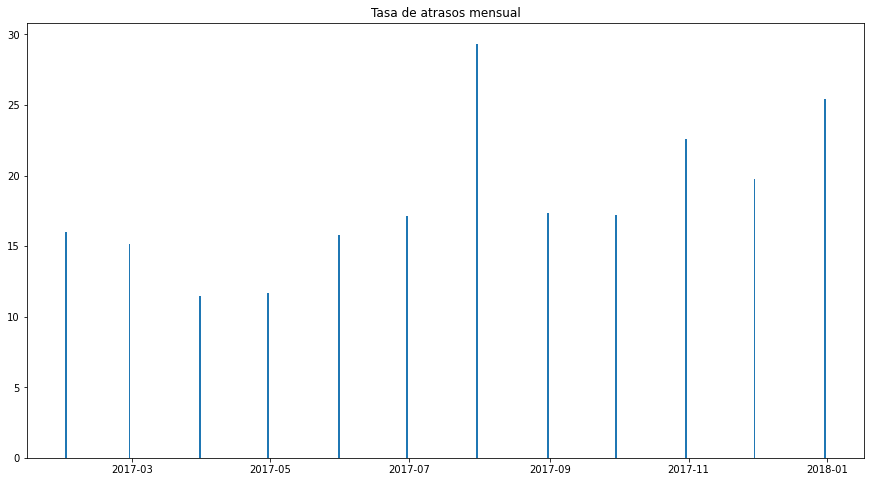

In [40]:
plt.rcParams['figure.figsize']=[15,8]
plt.bar(tabla_fechas.index, tabla_fechas['tasa_atraso_mensual'])
plt.title('Tasa de atrasos mensual')

### Conclusiones

* El mes con mayor tasa de atraso fue julio con un 29,3%.
* Los 3 meses con mayores tasas de atraso fueron julio (29,3%), diciembre (25,4%) y octubre (22,5%).
* Probablemente julio, mes con mayor tasa de atraso, tiene mayores vuelos con destinos internacionales a paises del hemisfério norte.

## 2.6 Atrasos por día

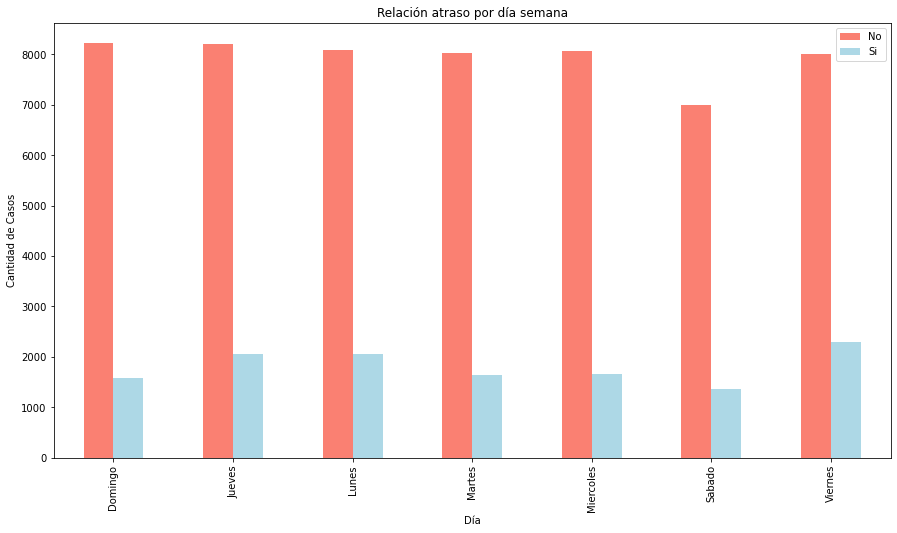

In [41]:
# por día
pd.crosstab(df.DIANOM, df.atraso_15).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación atraso por día semana')
plt.xlabel('Día')
plt.ylabel('Cantidad de Casos')
plt.legend(['No', 'Si']);

In [42]:
tablaDia=pd.crosstab(df.DIANOM, df.atraso_15, margins=True, normalize='index')*100
tablaDia

atraso_15,0,1
DIANOM,,
Domingo,83.891384,16.108616
Jueves,80.050727,19.949273
Lunes,79.784819,20.215181
Martes,83.088387,16.911613
Miercoles,82.915038,17.084962
Sabado,83.680556,16.319444
Viernes,77.798290,22.201710
All,81.506026,18.493974


In [43]:
tablaDia_cant=pd.crosstab(df.DIANOM, df.atraso_15, margins=True, margins_name='Total')
tablaDia_cant

atraso_15,0,1,Total
DIANOM,,,
Domingo,8218,1578,9796
Jueves,8206,2045,10251
Lunes,8083,2048,10131
Martes,8028,1634,9662
Miercoles,8061,1661,9722
Sabado,6989,1363,8352
Viernes,8007,2285,10292
Total,55592,12614,68206


### Conclusiones

* El día con mayor tasa de atraso es el viernes con un 22,2%, seguido del lunes con un 20,2%. En ambos días hay un alto número de vuelos.
* El jueves hay una cantidad similar de vuelos a la del viernes y lunes, pero su tasa de atrasos es menor 19,9%.
* El día con menor tasa de atrasos con un 16,1%, seguido por el sábado con un 16,3%.

## 2.7 Atraso según temporada

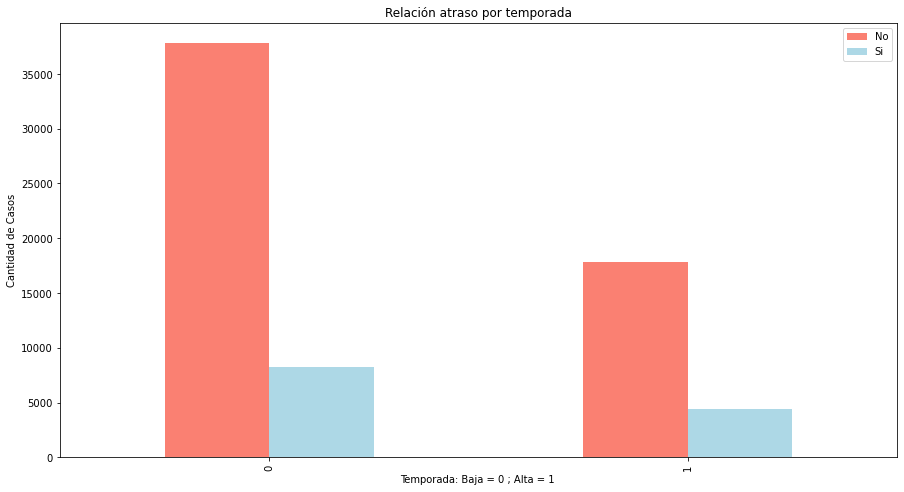

In [44]:
pd.crosstab(df.temporada_alta, df.atraso_15).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación atraso por temporada')
plt.xlabel('Temporada: Baja = 0 ; Alta = 1 ')
plt.ylabel('Cantidad de Casos')
plt.legend(['No', 'Si']);

In [45]:
tablaTemporada=pd.crosstab(df.temporada_alta, df.atraso_15, margins=True, normalize='index')*100
tablaTemporada

atraso_15,0,1
temporada_alta,,
0,82.120817,17.879183
1,80.230776,19.769224
All,81.506026,18.493974


In [46]:
tablaTemporada_cant=pd.crosstab(df.temporada_alta, df.atraso_15, margins=True, margins_name='Total')
tablaTemporada_cant

atraso_15,0,1,Total
temporada_alta,,,
0,37792,8228,46020
1,17800,4386,22186
Total,55592,12614,68206


### Conclusiones

* La tasa de atrasos es mayor en temporada alta, 19,7% vertus el 17,8% de la temporada baja.
* La cantidad de vuelos en temporada baja (46.020) es considerablemente mayor que en alta (22.186), sin embargo su tasa de atrasos es menor. Esto posiblemente generado por la influencia de una mayor cantidad de vuelos internacionales.

## 2.8 Atraso según tipo de vuelo, nacional o internacional

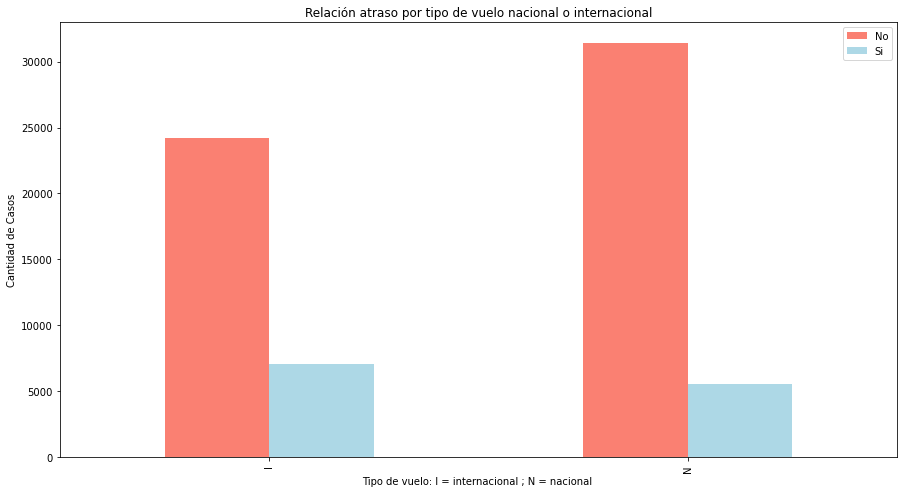

In [47]:
pd.crosstab(df.TIPOVUELO, df.atraso_15).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación atraso por tipo de vuelo nacional o internacional')
plt.xlabel('Tipo de vuelo: I = internacional ; N = nacional ')
plt.ylabel('Cantidad de Casos')
plt.legend(['No', 'Si']);

In [48]:
tablaTipoVuelo=pd.crosstab(df.TIPOVUELO, df.atraso_15, margins=True, normalize='index')*100
tablaTipoVuelo

atraso_15,0,1
TIPOVUELO,,
I,77.439181,22.560819
N,84.942921,15.057079
All,81.506026,18.493974


In [49]:
tablaTipoVuelo_cant=pd.crosstab(df.TIPOVUELO, df.atraso_15, margins=True, margins_name='Total')
tablaTipoVuelo_cant

atraso_15,0,1,Total
TIPOVUELO,,,
I,24192,7048,31240
N,31400,5566,36966
Total,55592,12614,68206


### Conclusiones

* La tasa de atraso de los vuelos internacionales es considerablemente mayor que los vuelos nacionales 22,5% vertus 15%.
* A pesar que los vuelos nacionales son más, su tasa de atrasos es menor.

## 2.9 Atraso según variables combinadas

In [50]:
tipoVuelogb=df.groupby(['TIPOVUELO','OPERA','atraso_15'])['atraso_15'].count()
tipoVuelogb

TIPOVUELO  OPERA                     atraso_15
I          Aerolineas Argentinas     0             1481
                                     1              468
           Aeromexico                0              341
                                     1               10
           Air Canada                0              307
                                     1              258
           Air France                0              328
                                     1               30
           Alitalia                  0              230
                                     1               29
           American Airlines         0              706
                                     1               51
           Austral                   0               59
                                     1               15
           Avianca                   0              846
                                     1              306
           British Airways           0              176
 

In [51]:
tipoVuelogb2=tipoVuelogb.unstack()
tipoVuelogb2

atraso_15                               0     1
TIPOVUELO OPERA                                
I         Aerolineas Argentinas      1481   468
          Aeromexico                  341    10
          Air Canada                  307   258
          Air France                  328    30
          Alitalia                    230    29
          American Airlines           706    51
          Austral                      59    15
          Avianca                     846   306
          British Airways             176    29
          Copa Air                   1734   116
          Delta Air                   337    21
          Gol Trans                   519   287
          Grupo LATAM               13115  4034
          Iberia                      326    36
          JetSmart SPA                  2     4
          K.L.M.                      230    21
          Lacsa                        81    11
          Latin American Wings        550   488
          Oceanair Linhas Aereas      236    43
          Plus Ultra Lineas Aereas     19    30
          Qantas Airways               82   113
          Sky Airline                2169   631
          United Airlines             318    17
N         Grupo LATAM               20471  3272
          JetSmart SPA                897   192
          Latin American Wings        443   193
          Sky Airline                9589  1909

In [52]:
tipoVuelogb2['tasa_atraso']=(tipoVuelogb2[1]/(tipoVuelogb2[0]+tipoVuelogb2[1]))*100

In [53]:
tipoVuelogb2

atraso_15                               0     1  tasa_atraso
TIPOVUELO OPERA                                             
I         Aerolineas Argentinas      1481   468    24.012314
          Aeromexico                  341    10     2.849003
          Air Canada                  307   258    45.663717
          Air France                  328    30     8.379888
          Alitalia                    230    29    11.196911
          American Airlines           706    51     6.737120
          Austral                      59    15    20.270270
          Avianca                     846   306    26.562500
          British Airways             176    29    14.146341
          Copa Air                   1734   116     6.270270
          Delta Air                   337    21     5.865922
          Gol Trans                   519   287    35.607940
          Grupo LATAM               13115  4034    23.523238
          Iberia                      326    36     9.944751
          JetSmart SPA                  2     4    66.666667
          K.L.M.                      230    21     8.366534
          Lacsa                        81    11    11.956522
          Latin American Wings        550   488    47.013487
          Oceanair Linhas Aereas      236    43    15.412186
          Plus Ultra Lineas Aereas     19    30    61.224490
          Qantas Airways               82   113    57.948718
          Sky Airline                2169   631    22.535714
          United Airlines             318    17     5.074627
N         Grupo LATAM               20471  3272    13.780904
          JetSmart SPA                897   192    17.630854
          Latin American Wings        443   193    30.345912
          Sky Airline                9589  1909    16.602887

In [54]:
tipoVuelogb2.sort_values('tasa_atraso', ascending=False)

atraso_15                               0     1  tasa_atraso
TIPOVUELO OPERA                                             
I         JetSmart SPA                  2     4    66.666667
          Plus Ultra Lineas Aereas     19    30    61.224490
          Qantas Airways               82   113    57.948718
          Latin American Wings        550   488    47.013487
          Air Canada                  307   258    45.663717
          Gol Trans                   519   287    35.607940
N         Latin American Wings        443   193    30.345912
I         Avianca                     846   306    26.562500
          Aerolineas Argentinas      1481   468    24.012314
          Grupo LATAM               13115  4034    23.523238
          Sky Airline                2169   631    22.535714
          Austral                      59    15    20.270270
N         JetSmart SPA                897   192    17.630854
          Sky Airline                9589  1909    16.602887
I         Oceanair Linhas Aereas      236    43    15.412186
          British Airways             176    29    14.146341
N         Grupo LATAM               20471  3272    13.780904
I         Lacsa                        81    11    11.956522
          Alitalia                    230    29    11.196911
          Iberia                      326    36     9.944751
          Air France                  328    30     8.379888
          K.L.M.                      230    21     8.366534
          American Airlines           706    51     6.737120
          Copa Air                   1734   116     6.270270
          Delta Air                   337    21     5.865922
          United Airlines             318    17     5.074627
          Aeromexico                  341    10     2.849003

### Conclusiones

* Se distinguen aerolíneas con una tasa relativa mayor de atrasos, las más altas tasas de atraso son en vuelos internacionales.
* Las aerolíneas que operan en nacional e internacional son 4, mientras que sólo internacional son 19.
* La aerolinea Latin American Wings opera en vuelos nacionales e internacionales y en ambos casos tiene tasas de atraso mayores al promedio, 47% internacional y 30,3% nacional.
* Las aerolineas que operan a nivel nacional e internacional simultáneamente Grupo LATAM,Sky Airline y JetSmart SPA, tienens tasas de atraso combinadas menores al promedio general, pero todas tienen tasas de atraso considerablemente mayores en vuelos internacionales versus nacionales.
* Grupo LATAM es la aerolínea con mayor cantidad de vuelos y tiene una tasa de atraso combinada menor al promedio.


# Parte 3

* Preparación de la data
* Modelos predictivos y métricas
* Conclusiones

## 3.1 Preparación de la data

* Tratamiento de nulos e inconsistencias de la data
* Separación conjuntos x e y
* Revisión de correlación
* Preparación de conjuntos de entrenamiento y test

In [55]:
df=pd.read_csv('synthetic_features_full.csv')

C:\Users\saave\AppData\Local\Temp\ipykernel_10124\1963645408.py:1: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('synthetic_features_full.csv')


In [56]:
df.head()

,Unnamed: 0,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,Hora,periodo_dia
0,0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,...,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,23:30:00,noche
1,1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,...,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,23:30:00,noche
2,2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,...,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,23:30:00,noche
3,3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,...,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,23:30:00,noche
4,4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,...,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,23:30:00,noche


In [57]:
df=df.drop('Unnamed: 0', axis=1)

### a) Nulos e inconsistencias de la data

* Tal como se aprecia en la carga de la data, Pandas advierte que hay columnas con datos mixtos (2 a la 7)
* Se elimina columna Unnamed: 0 que fué creada automáticamente y es un duplicado del índice

#### Tratamiento de nulos e inconsistencias

In [58]:
# columnas_con_inconsistencias = 'Vlo-I','Ori-I','Des-I','Emp-I','Fecha-O','Vlo-O'

In [59]:
df['Vlo-I']=pd.to_numeric(df['Vlo-I'], errors='coerce', downcast='integer')

In [60]:
df['Vlo-O']=pd.to_numeric(df['Vlo-O'], errors='coerce', downcast='integer')

In [61]:
for x in [2,3,4,5]:
    df.iloc[:, x] = df.iloc[:, x].values.astype(str)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha-I         68206 non-null  object 
 1   Vlo-I           68201 non-null  float64
 2   Ori-I           68206 non-null  object 
 3   Des-I           68206 non-null  object 
 4   Emp-I           68206 non-null  object 
 5   Fecha-O         68206 non-null  object 
 6   Vlo-O           68189 non-null  float64
 7   Ori-O           68206 non-null  object 
 8   Des-O           68206 non-null  object 
 9   Emp-O           68206 non-null  object 
 10  DIA             68206 non-null  int64  
 11  MES             68206 non-null  int64  
 12  AÑO             68206 non-null  int64  
 13  DIANOM          68206 non-null  object 
 14  TIPOVUELO       68206 non-null  object 
 15  OPERA           68206 non-null  object 
 16  SIGLAORI        68206 non-null  object 
 17  SIGLADES        68206 non-null 

In [63]:
df['Vlo-I'].value_counts()

174.0     686
11.0      645
116.0     608
150.0     557
704.0     556
         ... 
1154.0      1
1113.0      1
1121.0      1
1116.0      1
30.0        1
Name: Vlo-I, Length: 579, dtype: int64

In [64]:
df['Vlo-I']=df['Vlo-I'].fillna(174.0)

In [65]:
df['Vlo-I'].value_counts()

174.0     691
11.0      645
116.0     608
150.0     557
704.0     556
         ... 
1154.0      1
1113.0      1
1121.0      1
1116.0      1
30.0        1
Name: Vlo-I, Length: 579, dtype: int64

In [66]:
df['Vlo-O'].value_counts()

174.0     686
11.0      646
116.0     608
150.0     557
704.0     555
         ... 
356.0       1
9622.0      1
8541.0      1
8665.0      1
1363.0      1
Name: Vlo-O, Length: 594, dtype: int64

In [67]:
df['Vlo-O']=df['Vlo-O'].fillna(174.0)

In [68]:
df['Vlo-O'].value_counts()

174.0     703
11.0      646
116.0     608
150.0     557
704.0     555
         ... 
356.0       1
9622.0      1
8541.0      1
8665.0      1
1363.0      1
Name: Vlo-O, Length: 594, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha-I         68206 non-null  object 
 1   Vlo-I           68206 non-null  float64
 2   Ori-I           68206 non-null  object 
 3   Des-I           68206 non-null  object 
 4   Emp-I           68206 non-null  object 
 5   Fecha-O         68206 non-null  object 
 6   Vlo-O           68206 non-null  float64
 7   Ori-O           68206 non-null  object 
 8   Des-O           68206 non-null  object 
 9   Emp-O           68206 non-null  object 
 10  DIA             68206 non-null  int64  
 11  MES             68206 non-null  int64  
 12  AÑO             68206 non-null  int64  
 13  DIANOM          68206 non-null  object 
 14  TIPOVUELO       68206 non-null  object 
 15  OPERA           68206 non-null  object 
 16  SIGLAORI        68206 non-null  object 
 17  SIGLADES        68206 non-null 

* Los campos numéricos se trataron con pd.to_numeric
* Los campos object se convirtieron a str
* Los nulos numéricos se reemplazaron por el valor más repetido

#### Tratamiento de datos sin variación 

* Se revisarán las columnas que no presenten variación y se procederá a eliminarlas a efectos de no afectar al modelo predictivo dado que no tienen valor en ese contexto.

In [70]:
def unicosdf(df):
    uni_dic={}
    for i in df.columns:
        uni_dic[i]=len(df[i].unique())     
    return uni_dic  

In [71]:
var_columnas=unicosdf(df)

In [72]:
var_columnas

{'Fecha-I': 53252,
 'Vlo-I': 579,
 'Ori-I': 1,
 'Des-I': 64,
 'Emp-I': 30,
 'Fecha-O': 62774,
 'Vlo-O': 594,
 'Ori-O': 1,
 'Des-O': 63,
 'Emp-O': 32,
 'DIA': 31,
 'MES': 12,
 'AÑO': 2,
 'DIANOM': 7,
 'TIPOVUELO': 2,
 'OPERA': 23,
 'SIGLAORI': 1,
 'SIGLADES': 62,
 'temporada_alta': 2,
 'dif_min': 176,
 'atraso_15': 2,
 'Hora': 1093,
 'periodo_dia': 3}

#### Columnas sin variación

* 'Ori-I', 'Ori-O', 'SIGLAORI'

In [73]:
df=df.drop(['Ori-I','Ori-O','SIGLAORI'], axis=1)

In [74]:
df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,dif_min,atraso_15,Hora,periodo_dia
0,2017-01-01 23:30:00,226.0,KMIA,AAL,2017-01-01 23:33:00,226.0,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Miami,1,3.0,0,23:30:00,noche
1,2017-01-02 23:30:00,226.0,KMIA,AAL,2017-01-02 23:39:00,226.0,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Miami,1,9.0,0,23:30:00,noche
2,2017-01-03 23:30:00,226.0,KMIA,AAL,2017-01-03 23:39:00,226.0,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Miami,1,9.0,0,23:30:00,noche
3,2017-01-04 23:30:00,226.0,KMIA,AAL,2017-01-04 23:33:00,226.0,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Miami,1,3.0,0,23:30:00,noche
4,2017-01-05 23:30:00,226.0,KMIA,AAL,2017-01-05 23:28:00,226.0,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Miami,1,-2.0,0,23:30:00,noche


### Conversión de variables categóricas a numéricas

In [75]:
# variables categóricas
cat_cols=['Fecha-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO',
       'OPERA','SIGLADES', 'Hora', 'periodo_dia']

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [77]:
df[cat_cols]=df[cat_cols].apply(encoder.fit_transform)

In [78]:
df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,dif_min,atraso_15,Hora,periodo_dia
0,124,226.0,9,0,140,226.0,10,2,1,1,2017,0,0,5,34,1,3.0,0,1084,1
1,274,226.0,9,0,323,226.0,10,2,2,1,2017,2,0,5,34,1,9.0,0,1084,1
2,416,226.0,9,0,502,226.0,10,2,3,1,2017,3,0,5,34,1,9.0,0,1084,1
3,549,226.0,9,0,679,226.0,10,2,4,1,2017,4,0,5,34,1,3.0,0,1084,1
4,689,226.0,9,0,852,226.0,10,2,5,1,2017,1,0,5,34,1,-2.0,0,1084,1


### b) Revisión de correlación

In [79]:
df.corr()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,dif_min,atraso_15,Hora,periodo_dia
Fecha-I,1.000000,0.015336,-0.007354,0.002658,0.999811,0.016761,-0.007180,-0.012808,0.096907,0.995423,0.009483,0.008663,0.012609,0.022017,0.004526,-0.241619,0.075014,0.082126,-0.008656,0.005965
Vlo-I,0.015336,1.000000,-0.118651,0.155017,0.015153,0.997821,-0.122778,0.077390,-0.001954,0.015566,-0.000955,0.011115,-0.404090,-0.123879,0.358137,0.015161,0.058606,0.067745,-0.053821,0.044912
Des-I,-0.007354,-0.118651,1.000000,0.320684,-0.007593,-0.117598,0.999695,0.408554,0.000526,-0.007479,-0.009979,0.001053,0.358069,0.318329,0.159896,0.009138,0.027725,0.003750,-0.161799,-0.015842
Emp-I,0.002658,0.155017,0.320684,1.000000,0.002417,0.155250,0.323207,0.920175,0.002544,0.002030,-0.001038,0.001626,0.292652,0.891072,0.162948,0.012080,0.028418,0.011886,-0.036050,-0.003704
Fecha-O,0.999811,0.015153,-0.007593,0.002417,1.000000,0.016594,-0.007419,-0.013064,0.097391,0.995980,0.009372,0.008787,0.012154,0.021729,0.004154,-0.250136,0.075534,0.082392,-0.009272,0.005549
Vlo-O,0.016761,0.997821,-0.117598,0.155250,0.016594,1.000000,-0.121807,0.077794,-0.001976,0.017050,-0.000950,0.010854,-0.403313,-0.123772,0.359966,0.014437,0.058277,0.066944,-0.054123,0.045338
Des-O,-0.007180,-0.122778,0.999695,0.323207,-0.007419,-0.121807,1.000000,0.411981,0.000500,-0.007298,-0.009996,0.000955,0.363522,0.320726,0.160222,0.009041,0.028055,0.003847,-0.163097,-0.016321
Emp-O,-0.012808,0.077390,0.408554,0.920175,-0.013064,0.077794,0.411981,1.000000,0.001036,-0.013458,-0.001722,-0.003393,0.437365,0.795611,0.170455,0.012990,0.002289,-0.019992,-0.020743,0.008528
DIA,0.096907,-0.001954,0.000526,0.002544,0.097391,-0.001976,0.000500,0.001036,1.000000,0.014318,-0.009073,-0.007998,0.001277,0.005472,-0.001545,0.222410,-0.006706,-0.002517,-0.001697,0.002118
MES,0.995423,0.015566,-0.007479,0.002030,0.995980,0.017050,-0.007298,-0.013458,0.014318,1.000000,-0.008642,0.009252,0.011564,0.021092,0.003939,-0.277328,0.077280,0.083416,-0.012792,0.003422


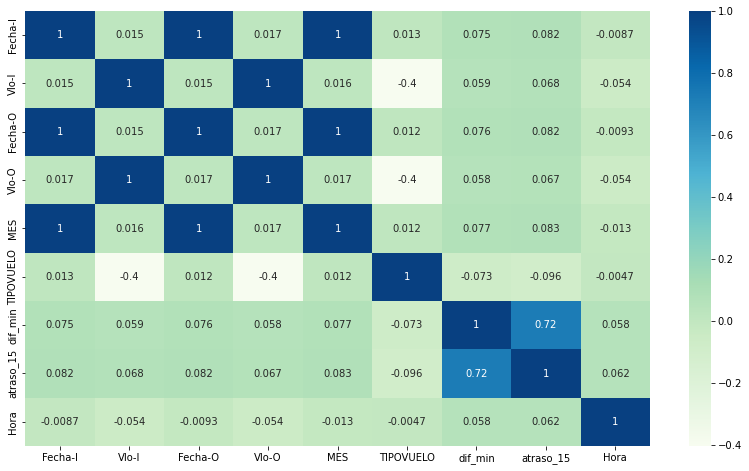

In [80]:
plt.figure(figsize=(14,8))
correlacion=df.corr()
correlacion_positiva=correlacion.index[abs(correlacion['atraso_15']) > 0.05] # se aplica filtro de magnitud de correlación igual a 0.05

corr_heatmap=sns.heatmap(df[correlacion_positiva].corr(), annot=True, cmap='GnBu')

### Observaciones a la gráfica de correlación con mapa de calor

* Existen variables que tienen la máxima correlación con otras variables además de si mismas.
* Producto de lo anterior, esas variables serán sacadas para evitar errores del tipo 'PerfectSeparationError'.

In [81]:
# Variables observadas según el punto anterior
var_observadas=['Fecha-I','Fecha-O','Vlo-I','Vlo-O']

In [82]:
df=df.drop(var_observadas, axis=1)

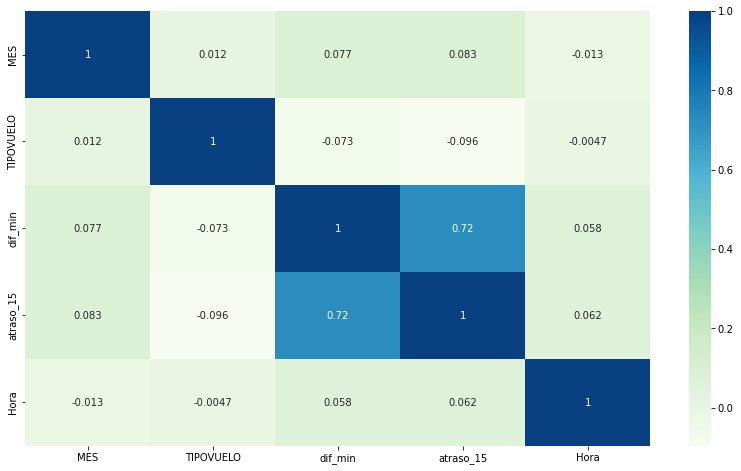

In [83]:
plt.figure(figsize=(14,8))
correlacion=df.corr()
correlacion_positiva=correlacion.index[abs(correlacion['atraso_15']) > 0.05] # se aplica filtro de magnitud de correlación igual a 0.05

corr_heatmap=sns.heatmap(df[correlacion_positiva].corr(), annot=True, cmap='GnBu')

#### Notas de este punto

* Se procedió a eliminar las columnas antes mencionadas y de este modo se espera que los modelos predictivos puedan funcionar bien y que alcancen métricas razonables de desempeño.
* Ahora es necesario revisar la correlación de variables en general y ver si aún hay variables con máxima correlación con otras variables además de con si mismas.

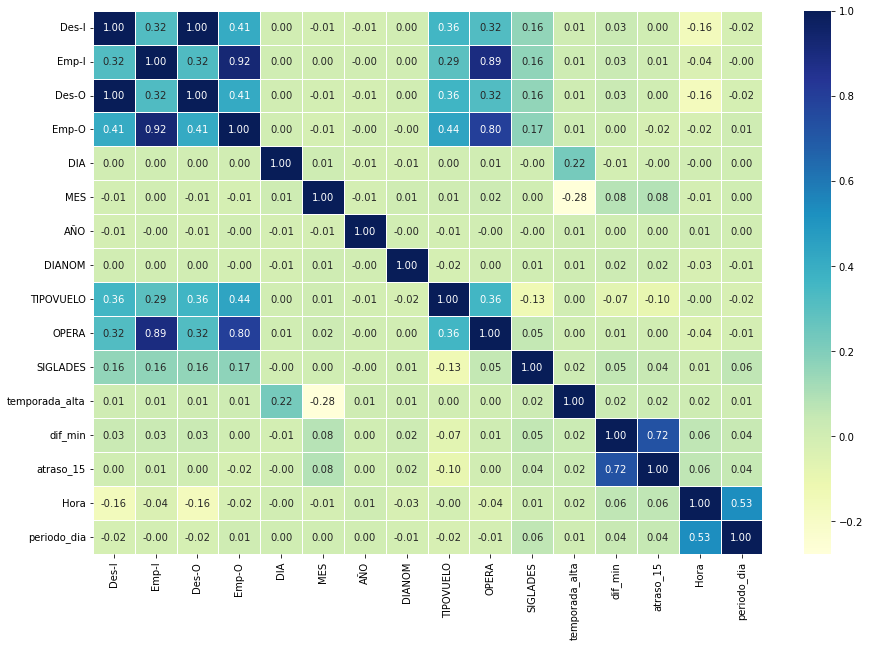

In [84]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True, 
                fmt='.2f',
                linewidths=0.5,
                cmap='YlGnBu')

In [85]:
# Variables observadas según el punto anterior
var_observadas2=['Des-I','Des-O','Emp-I','Emp-O']

In [86]:
df=df.drop(var_observadas2, axis=1)

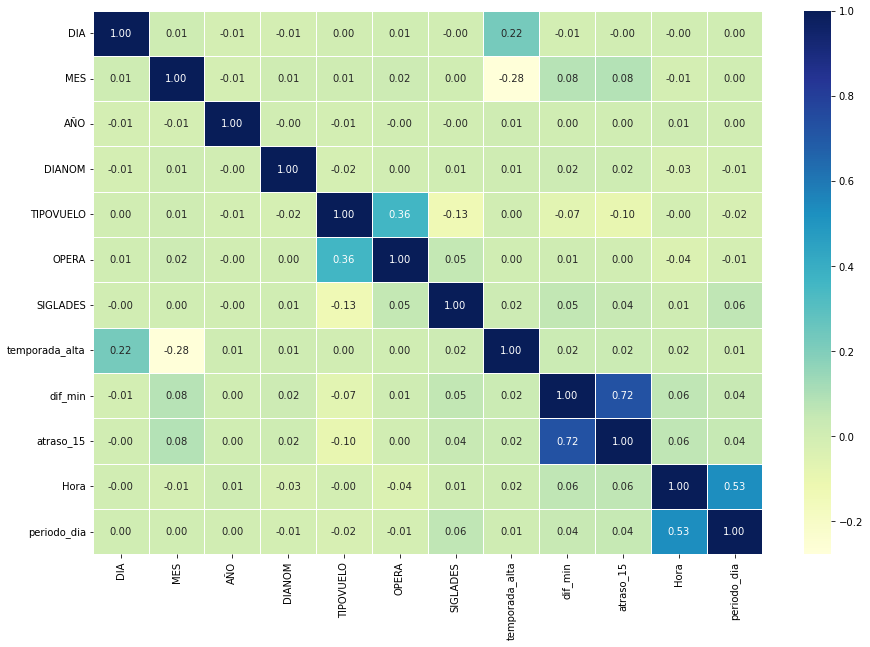

In [87]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True, 
                fmt='.2f',
                linewidths=0.5,
                cmap='YlGnBu')

#### Notas finales de la correlación

* Finalmente se descartan las variables observadas a efectos de favorecer el desempeño del modelo

In [88]:
df.shape

(68206, 12)

### c) Separación conjunto de datos x e y 

In [90]:
x=df.loc[:, df.columns != 'atraso_15']
y=df.loc[:,'atraso_15']

In [91]:
print(f'dimensiones conjunto x = {x.shape} ---- dimensiones conjunto y = {y.shape}')

dimensiones conjunto x = (68206, 11) ---- dimensiones conjunto y = (68206,)


### d) Preparación conjuntos de entrenamiento y test

* Dada la alta diferencia de escala de los valores de x se procederá a normalizar

In [92]:
def minmax_norm(data):
    return (data - data.min()) / ( data.max() - data.min())

In [93]:
x=minmax_norm(x)

In [94]:
x.head()

,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,dif_min,Hora,periodo_dia
0,0.000000,0.0,0.0,0.000000,0.0,0.227273,0.557377,1.0,0.097143,0.992674,0.5
1,0.033333,0.0,0.0,0.333333,0.0,0.227273,0.557377,1.0,0.131429,0.992674,0.5
2,0.066667,0.0,0.0,0.500000,0.0,0.227273,0.557377,1.0,0.131429,0.992674,0.5
3,0.100000,0.0,0.0,0.666667,0.0,0.227273,0.557377,1.0,0.097143,0.992674,0.5
4,0.133333,0.0,0.0,0.166667,0.0,0.227273,0.557377,1.0,0.068571,0.992674,0.5


In [95]:
x.shape

(68206, 11)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=123,test_size=0.3)

In [98]:
print("x_train",x_train.shape,"\ny_train",y_train.shape)
print("x_test",x_test.shape,"\ny_test",y_test.shape)

x_train (47744, 11) 
y_train (47744,)
x_test (20462, 11) 
y_test (20462,)


## 3.2 Modelos predictivos y métricas

* Primera prueba: consistente en probar de entrada 3 modelos tradicionales y medirlos por sus scores generales

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(n_neighbors=10),
    'Random': RandomForestClassifier(n_estimators=50)
}

In [101]:
def fit_and_score(models, x_train, x_test, y_train, y_test):

    np.random.seed(42)
    #guardar los scores 
    models_scores = {}
    
    #loop
    for name, model in models.items():
        #entrenamos el modelo
        model.fit(x_train, y_train)
        #evaluamos el desempeño
        models_scores[name] = model.score(x_test, y_test)
        
    return models_scores

In [102]:
models_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

In [103]:
models_scores

{'Logistic Regression': 0.9795230182777832,
 'KNN': 0.8728863258723487,
 'Random': 1.0}

### Conclusiones

* Bastó con aplicar la prueba simultánea con 3 modelos de clasificación para verificar que se genera overfitting.
* Producto de lo anterior los caminos de solución pasa en mayor medida por simplificar los modelos actuales y/o agregar nuevos datos.

### Prueba de simplificación del modelo

* Se simplificará el modelo sacando variables adiconales creadas de diff_min y hora.

In [105]:
df=df.drop(['dif_min','Hora'], axis=1)

In [106]:
df.shape

(68206, 10)

In [107]:
x=df.loc[:, df.columns != 'atraso_15']
y=df.loc[:,'atraso_15']

In [108]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=123,test_size=0.3)

In [109]:
print("x_train",x_train.shape,"\ny_train",y_train.shape)
print("x_test",x_test.shape,"\ny_test",y_test.shape)

x_train (47744, 9) 
y_train (47744,)
x_test (20462, 9) 
y_test (20462,)


In [110]:
models_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

C:\Users\saave\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
models_scores

{'Logistic Regression': 0.8150718404848011,
 'KNN': 0.8134102238295376,
 'Random': 0.787117583813899}

### Observaciones

* Se verifica que las métricas luego de la simplificación del modelo alcanzan valores razonables.
* Se procede a realizar una nueva evaluación a efectos de ver más opciones de simplificación y a la vez alcanzar mejoras.

In [112]:
import statsmodels.api as sm

x_m=sm.add_constant(x_train)
logit=sm.Logit(y_train, x_m)
resultado=logit.fit()
resultado.summary()

         Current function value: 0.468005
         Iterations: 35


C:\Users\saave\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              atraso_15   No. Observations:                47744
Model:                          Logit   Df Residuals:                    47734
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Aug 2022   Pseudo R-squ.:                 0.02256
Time:                        01:04:25   Log-Likelihood:                -22344.
converged:                      False   LL-Null:                       -22860.
Covariance Type:            nonrobust   LLR p-value:                2.566e-216
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2795.2791   6168.494      0.453      0.650   -9294.746    1.49e+04
DIA               -0.0044      0.001     -3.125      0.002      -0.007      -0.002
MES                0.0709      0.004     20.216      0.000       0.064       0.078
AÑO               -1.3869      3.058     -0.454      0.650      -7.381       4.607
DIANOM             0.0114      0.006      1.917      0.055      -0.000       0.023
TIPOVUELO         -0.5456      0.026    -21.128      0.000      -0.596      -0.495
OPERA              0.0173      0.003      6.743      0.000       0.012       0.022
SIGLADES           0.0037      0.001      5.375      0.000       0.002       0.005
temporada_alta     0.2593      0.027      9.573      0.000       0.206       0.312
periodo_dia        0.1072      0.014      7.439      0.000       0.079       0.135
==================================================================================
"""

### Observaciones

* A nivel de Pvalue las variables de Año y Dianom no tienen una significancia relevante y podría sacarse para evaluar su impacto en el desempeño.

In [113]:
df=df.drop(['AÑO','DIANOM'], axis=1)

In [114]:
df.shape

(68206, 8)

In [115]:
x=df.loc[:, df.columns != 'atraso_15']
y=df.loc[:,'atraso_15']

In [116]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=123,test_size=0.3)

In [117]:
print("x_train",x_train.shape,"\ny_train",y_train.shape)
print("x_test",x_test.shape,"\ny_test",y_test.shape)

x_train (47744, 7) 
y_train (47744,)
x_test (20462, 7) 
y_test (20462,)


In [118]:
models_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

In [119]:
models_scores

{'Logistic Regression': 0.8150718404848011,
 'KNN': 0.8142899032352654,
 'Random': 0.7779298211318542}

In [121]:
modelo=KNeighborsClassifier(n_neighbors=10)

In [122]:
modelo.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [123]:
y_pred=modelo.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
compa=pd.DataFrame({'prediccion':y_pred, 'test':y_test}) #dataframe comparando resultado predicción vs test
compa.head(10)

,prediccion,test
31175,0,0
15962,0,0
41409,0,0
55786,0,0
31027,0,0
45311,0,0
7941,0,0
45814,0,0
11200,0,0
63352,0,0


In [125]:
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print(matriz)

[[16409   269]
 [ 3531   253]]


In [127]:
from sklearn.metrics import accuracy_score #ahora se medirá la precisión del modelo
exactitud=accuracy_score(y_test, y_pred)
print(f'La exactitud (accuracy) del modelo KNN es del = {exactitud}') 

La exactitud (accuracy) del modelo KNN es del = 0.8142899032352654


### Conclusiones

* El modelo KNN que en un comienzo arrojó métricas más razonables se evaluó con métricas adicionales de accuracy y matriz de confusión.
En ambos casos mostró un desempeño razonable superando el 81% en sus predicciones.

# 4. Respuestas finales del desafío


Desafío
1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Respuesta: La distribución de los datos en torno al target de predicción de atrasos es perceptible desde la exploración inicial de los datos y gráficas, y está orientado al tipo de vuelo, seguido por la aerolínea y otros como temporada y mes del año.

2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv.

Respuesta: Ok, archivos generados.

3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

Respuesta: Puntos desarrollados en numeral 2 de este notebook.

4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Respuesta: Punto desarrollado en numeral 3 de este notebook.

5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?

Respuesta: Se probaron de entrada 3 modelos en simultáneo, para luego en función de los resultados evaluar otros modelos o bien mejoras a estos mismos, entre otros. La métrica del score mostro que se presenta alto overfitting, el cual podría solucionarse o bien mitigarse agregando nuevos datos y/o simplificar los modelos actuales.
Dado lo anterior, el modelo que presentó el menor overfitting a pesar de ser igualmente alto, fue el de KNN con un 87.2% de score. Modelos de regresión logística y Randomforest llegaron casí al máximo y no serían recomendables con la data actual.

Atendido lo anterior se hicieron más pruebas simplificando la data sacando variables adicionales creadas y revisando las métricas. Luego de ello se probó con un modelo que muestra el pvalue a efectos de verificar opciones de hacer más simple el modelo sin perder valor predictivo, producto de ello se sacaron varibles según su pvalue (Año y Dianom), volviendo a probar y consiguiendo resultados similares pero al mismo tiempo, haciendo más liviano el procesamiento sin perder desempeño dado que se llegó a un accuracy mayor al 81%. Para este caso tanto el accuracy como la matriz de confusión son buenos indicadores, el primero por qué es más rápido de obtener y el segundo dado su visibilidad de aciertos, falsos verdaderos y falsos.

Mayores mejoras se pueden alcanzar de 2 formas, primero conocer más sobre las variables de la operación de los vuelos que de algún modo agreguen información del por qué un vuelo internacional en todas las aerolíneas tiene mayor tasa de atraso, también saber qué sucede con aerolíneas que tienen altas tasas de atrazo mayores al 60%, así mismo revisar a una aerolínea que tiene tasas de atraso nacional e internacional ampliamente por sobre el promedio general, entre otros de la operación. Y por otro lado, también pueden alcanzarse mejoras estudiando los parámetros del modelo para su configuración.
